In [6]:
import nltk

In [12]:
import pandas as pd

In [13]:
df=pd.read_csv('sms.tsv',sep='\t',names=['label','messages'])

In [14]:
df.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.groupby('label').describe()

messages                                                               
         count unique                                                top freq
label                                                                        
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [17]:
df['length']=df.messages.apply(len)

In [18]:
df.head()

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [19]:
import matplotlib.pyplot as plt

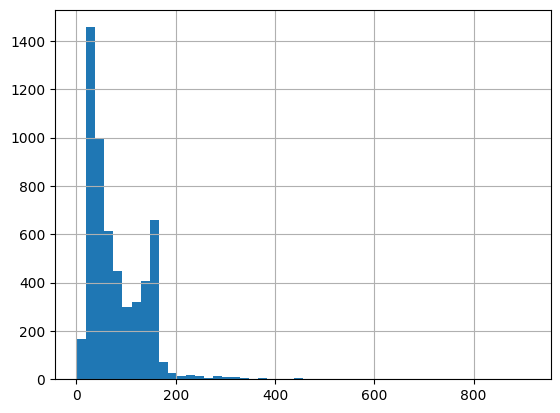

In [20]:
df.length.hist(bins=50)
plt.show()

In [21]:
df.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [23]:
df[df.length==910].iloc[0,1]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

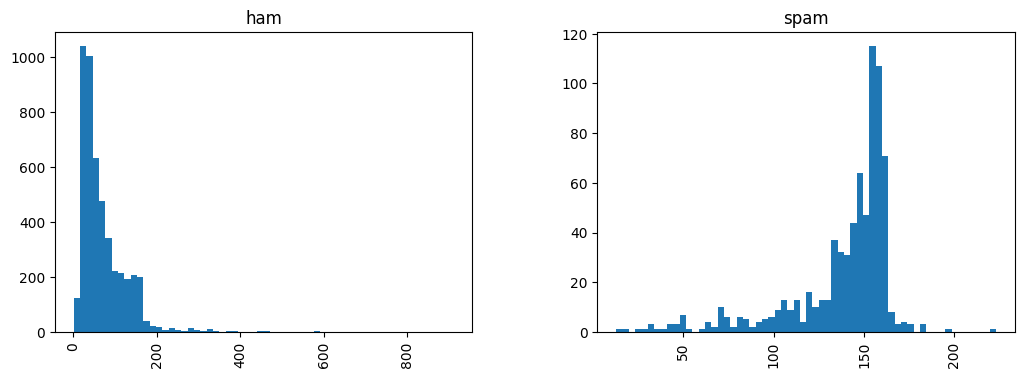

In [24]:
df.hist(column='length',by='label',figsize=(12,4),bins=60)
plt.show()

In [25]:
import string

In [26]:
s='hello john! how are you.. I am fime:'

In [27]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [28]:
no_punc=[i for i in s if i not in string.punctuation]
no_punc

['h',
 'e',
 'l',
 'l',
 'o',
 ' ',
 'j',
 'o',
 'h',
 'n',
 ' ',
 'h',
 'o',
 'w',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 'y',
 'o',
 'u',
 ' ',
 'I',
 ' ',
 'a',
 'm',
 ' ',
 'f',
 'i',
 'm',
 'e']

In [29]:
no_punc=''.join(no_punc)

In [30]:
no_punc

'hello john how are you I am fime'

In [31]:
from nltk.corpus import stopwords

In [33]:
stop_words=stopwords.words('english')
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [34]:
rm_words=[w for w in no_punc.split() if w.lower() not in stop_words]

In [35]:
rm_words

['hello', 'john', 'fime']

In [36]:
msg='hello john! how are you.. I am fime:'

In [37]:
def clean_text(msg):
    '''
    1:remove punc
    2:remove stop words
    '''
    m=[w  for w in msg if w not in string.punctuation]
    m=''.join(m)
    rm_stop_words=[w for w in m.split() if w.lower() not in stop_words]
    return ' '.join (rm_stop_words)
clean_text(msg)

'hello john fime'

In [38]:
df.head(10)

,label,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147
6,ham,Even my brother is not like to speak with me. ...,77
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160
8,spam,WINNER!! As a valued network customer you have...,157
9,spam,Had your mobile 11 months or more? U R entitle...,154


In [39]:
df.messages=df.messages.apply(clean_text)

In [40]:
df.messages=df.messages.apply(clean_text)

In [41]:
df['length']=df.messages.apply(len)

In [42]:
df.head(10)

,label,messages,length
0,ham,Go jurong point crazy Available bugis n great ...,82
1,ham,Ok lar Joking wif u oni,23
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...,135
3,ham,U dun say early hor U c already say,35
4,ham,Nah dont think goes usf lives around though,43
5,spam,FreeMsg Hey darling 3 weeks word back Id like ...,88
6,ham,Even brother like speak treat like aids patent,46
7,ham,per request Melle Melle Oru Minnaminunginte Nu...,113
8,spam,WINNER valued network customer selected receiv...,121
9,spam,mobile 11 months U R entitled Update latest co...,109
